In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/Users/gupenggao/Downloads/spam.csv',encoding='latin')
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
## Removing the Last Three Columns

final_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
final_df.sample(5)

,Type,SMS
40,ham,Pls go ahead with watts. I just wanted to be s...
1838,spam,Hack Chat. Get backdoor entry into 121 chat ro...
665,ham,En chikku nange bakra msg kalstiya..then had t...
2110,ham,Do we have any spare power supplies
1831,ham,Hello- thanx for taking that call. I got a job...


In [8]:
## Changing My Target to Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Type'] = le.fit_transform(final_df['Type'])

In [9]:
final_df.sample(5)

,Type,SMS
4607,0,We live in the next &lt;#&gt; mins
5443,1,You have won a guaranteed 32000 award or maybe...
4188,0,"Well the general price is &lt;#&gt; /oz, let ..."
5100,0,"Aight, call me once you're close"
2389,0,Boo. How's things? I'm back at home and a litt...


In [10]:
## Checking Missing Values
final_df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [11]:
##Check for Duplicated Values
final_df.duplicated().sum()

403

In [12]:
##Remove Duplicates
final_df = final_df.drop_duplicates(keep='first')
final_df.head()

,Type,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
final_df.shape

(5169, 2)

In [14]:
final_df.duplicated().sum()

0

In [16]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/gupenggao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gupenggao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
import re

ps = PorterStemmer()

def text_processing(text): 
    if isinstance(text, str):
        stemmer = nltk.porter.PorterStemmer()
        stop_words = stopwords.words('english')
        punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'
        text = re.sub('[{}]'.format(punctuation),'',text)
        text = re.sub('\n+','',text)
        text = re.sub('\\s+',' ',text)
        text = re.sub(r'[0-9]+','',text).lower()
        text = re.sub(r'[a-z0-9]{12,}','',text)
        text = ' '.join([stemmer.stem(w) for w in text.split() if w not in stop_words])
    else:
        text = ""
    return text

In [31]:
text_processing('I will love love loved DATA Science 111...')

'love love love data scienc'

In [30]:
final_df['transformed_text'] = final_df['SMS'].apply(text_processing)

In [31]:
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
sms_data = final_df['transformed_text'].tolist()  # Convert 'SMS' column to a list
unique_words = set()
for email in sms_data:
    words = email.split()
    unique_words.update(words)
word_counts = {}

for i, email in enumerate(sms_data, start=1):
    words = email.split()
    row_data = {}
    for word in unique_words:
        row_data[word] = words.count(word)
    word_counts[i] = row_data
new_df = pd.DataFrame.from_dict(word_counts, orient='index')
print(new_df)

      dammit  reject  gigolo  hearin  kilo  we'r  also  due  somon  ps  ...  \
1          0       0       0       0     0     0     0    0      0   0  ...   
2          0       0       0       0     0     0     0    0      0   0  ...   
3          0       0       0       0     0     0     0    0      0   0  ...   
4          0       0       0       0     0     0     0    0      0   0  ...   
5          0       0       0       0     0     0     0    0      0   0  ...   
...      ...     ...     ...     ...   ...   ...   ...  ...    ...  ..  ...   
5165       0       0       0       0     0     0     0    0      0   0  ...   
5166       0       0       0       0     0     0     0    0      0   0  ...   
5167       0       0       0       0     0     0     0    0      0   0  ...   
5168       0       0       0       0     0     0     0    0      0   0  ...   
5169       0       0       0       0     0     0     0    0      0   0  ...   

      cock  psp  suffici  teach  cttargg  ahead  me

In [39]:
## First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()

In [40]:
X = tf.fit_transform(final_df['transformed_text']).toarray()
# X = np.hstack((X,final_df['num_characters'].values.reshape(-1,1)))
len(X[1])

6799

In [41]:
y = np.array(final_df['Type'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
import sklearn
print (sklearn.__version__)

1.2.2


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [60]:
X_train.shape

(4135, 6799)

In [61]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [62]:
def model_scoring(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    metrics = {'accuracy': accuracy_score(y_test,pred),
               'f1-score': f1_score(y_test,pred), 
               'precision': precision_score(y_test,pred)}
    return metrics

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [64]:
sv = SVC(kernel='sigmoid',gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)


In [65]:
clfs= {
    'SVM':sv,
    'KNN':knn,
    'RFC':rfc,
    'GaussianNB':gnb,
    'BernoulliNB':bnb,
    'MultinomialNB':mnb
}
clfs

{'SVM': SVC(gamma=1.0, kernel='sigmoid'),
 'KNN': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
 'GaussianNB': GaussianNB(),
 'BernoulliNB': BernoulliNB(),
 'MultinomialNB': MultinomialNB()}

In [66]:
acc_score = []

for name,clf in clfs.items():
    current_score = model_scoring(clf,X_train,X_test,y_train,y_test)
    acc_score.append(name)
    acc_score.append(current_score)

In [67]:
acc_score

['SVM',
 {'accuracy': 0.9816247582205029,
  'f1-score': 0.9218106995884774,
  'precision': 0.9655172413793104},
 'KNN',
 {'accuracy': 0.9235976789168279,
  'f1-score': 0.5536723163841808,
  'precision': 0.98},
 'RFC',
 {'accuracy': 0.9729206963249516,
  'f1-score': 0.8782608695652175,
  'precision': 0.9805825242718447},
 'GaussianNB',
 {'accuracy': 0.8588007736943907,
  'f1-score': 0.6054054054054054,
  'precision': 0.4609053497942387},
 'BernoulliNB',
 {'accuracy': 0.9738878143133463,
  'f1-score': 0.8879668049792531,
  'precision': 0.9385964912280702},
 'MultinomialNB',
 {'accuracy': 0.9680851063829787,
  'f1-score': 0.8506787330316742,
  'precision': 1.0}]

In [75]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

k=3
kf = KFold(n_splits=k, random_state=None)
parameters_svm = {"clf": [SVC()],
                  "clf__kernel": ["sigmoid","rbf",'poly'],
                  "clf__C": [0.0001,0.1,100],
                 "clf__gamma": [0.0001,0.1,100]}
parameters_nb = {"clf": [MultinomialNB()],
                "clf__alpha": [0.0001, 0.001, 0.1, 1, 10, 100]}
parameters_knn = {"clf": [KNeighborsClassifier()], "clf__n_neighbors": [3,5,7,9,11,15],
                  "clf__metric": ["euclidean","manhattan"]}
model = Pipeline([("clf", SVC())])
params = [parameters_knn, parameters_nb, parameters_svm]
grid = GridSearchCV(model, params, cv=kf, scoring = "accuracy") 
grid.fit(X_train, y_train)
res = pd.DataFrame(grid.cv_results_) 
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__metric,param_clf__n_neighbors,param_clf__alpha,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075645,0.050735,0.471409,0.087867,KNeighborsClassifier(),euclidean,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.920232,0.921626,0.904935,0.915597,0.007561,13
1,0.035491,0.015487,0.349624,0.019080,KNeighborsClassifier(),euclidean,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.907179,0.910740,0.890421,0.902780,0.008859,16
2,0.026614,0.000855,0.337682,0.003134,KNeighborsClassifier(),euclidean,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.935460,0.902032,0.880987,0.906160,0.022429,15
3,0.026345,0.000811,0.336137,0.002710,KNeighborsClassifier(),euclidean,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.951414,0.892598,0.931060,0.925024,0.024388,9
4,0.026051,0.000696,0.344441,0.013342,KNeighborsClassifier(),euclidean,11,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.963742,0.923803,0.949927,0.945824,0.016561,7
5,0.027792,0.000213,0.345738,0.009704,KNeighborsClassifier(),euclidean,15,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.965917,0.956459,0.959361,0.960579,0.003956,6
6,0.050433,0.034298,5.488199,0.065740,KNeighborsClassifier(),manhattan,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.915881,0.918723,0.901306,0.911970,0.007629,14
7,0.052287,0.030920,5.767027,0.272848,KNeighborsClassifier(),manhattan,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.902828,0.906386,0.886792,0.898669,0.008523,17
8,0.090071,0.033284,6.092048,0.263845,KNeighborsClassifier(),manhattan,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.905729,0.901306,0.878084,0.895040,0.012125,19
9,0.055744,0.026904,5.864052,0.190655,KNeighborsClassifier(),manhattan,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.911530,0.891147,0.886067,0.896248,0.011003,18


In [76]:
grid.best_params_

{'clf': SVC(C=100, gamma=0.1),
 'clf__C': 100,
 'clf__gamma': 0.1,
 'clf__kernel': 'rbf'}

In [77]:
grid.best_score_

0.9770252733570423

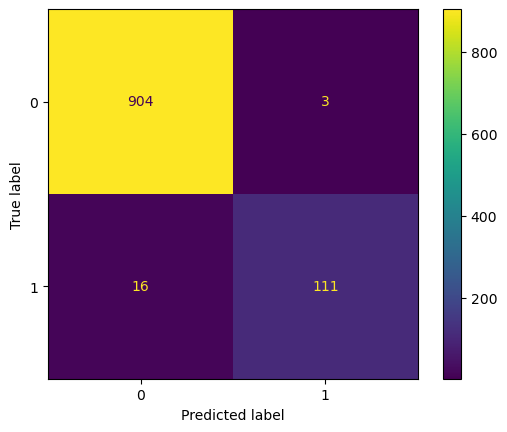

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(C=100, gamma=0.1,kernel = 'rbf')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [90]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

k=3
kf = KFold(n_splits=k, random_state=None)
parameters_svm = {"clf": [SVC()],
                  "clf__kernel": ["sigmoid","rbf",'poly'],
                  "clf__C": [0.0001,0.1,100],
                 "clf__gamma": [0.0001,0.1,100]}
parameters_nb = {"clf": [MultinomialNB()],
                "clf__alpha": [0.0001, 0.001, 0.1, 1, 10, 100]}
parameters_knn = {"clf": [KNeighborsClassifier()], "clf__n_neighbors": [3,5,7,9,11,15],
                  "clf__metric": ["euclidean","manhattan"]}
model = Pipeline([("clf", SVC())])
params = [parameters_knn, parameters_nb, parameters_svm]
grid = GridSearchCV(model, params, cv=kf, scoring = "average_precision") 
grid.fit(X_train, y_train)
res = pd.DataFrame(grid.cv_results_) 
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__metric,param_clf__n_neighbors,param_clf__alpha,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072650,0.057823,0.415206,0.064510,KNeighborsClassifier(),euclidean,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.529202,0.580003,0.528818,0.546008,0.024039,38
1,0.028545,0.001600,0.329986,0.005829,KNeighborsClassifier(),euclidean,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.824303,0.580003,0.819863,0.741390,0.114132,35
2,0.029458,0.003125,0.338637,0.006812,KNeighborsClassifier(),euclidean,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.874982,0.860920,0.903030,0.879644,0.017505,28
3,0.027056,0.002532,0.343254,0.008496,KNeighborsClassifier(),euclidean,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.909886,0.903221,0.933537,0.915548,0.013008,10
4,0.026345,0.000775,0.334487,0.007806,KNeighborsClassifier(),euclidean,11,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.924727,0.906100,0.941242,0.924023,0.014355,7
5,0.026859,0.000688,0.336882,0.004194,KNeighborsClassifier(),euclidean,15,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.925683,0.903129,0.942973,0.923929,0.016313,8
6,0.085558,0.042891,5.950986,0.249542,KNeighborsClassifier(),manhattan,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.502120,0.569261,0.501992,0.524458,0.031681,39
7,0.104316,0.024609,5.782356,0.090237,KNeighborsClassifier(),manhattan,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.721515,0.569261,0.700351,0.663709,0.067341,36
8,0.135416,0.038182,6.215697,0.470808,KNeighborsClassifier(),manhattan,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.763732,0.720248,0.760900,0.748294,0.019865,34
9,0.135851,0.007568,5.938878,0.248534,KNeighborsClassifier(),manhattan,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(), 'clf__metric':...",0.789939,0.745011,0.787954,0.774301,0.020727,33


In [91]:
grid.best_params_

{'clf': SVC(C=100, gamma=0.1),
 'clf__C': 100,
 'clf__gamma': 0.1,
 'clf__kernel': 'rbf'}

In [92]:
grid.best_score_

0.9623016582215728